In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (4.0, 2.)
pylab.rcParams['lines.linewidth'] = 1.0
pylab.rcParams['font.size'] = 12.0
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['axes.titlesize'] = '14' 
pylab.rcParams['axes.labelsize'] = '10'
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['figure.subplot.wspace'] = 0.5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
import itertools
from scipy import linalg
import matplotlib as mpl
import h5py

from detect import detectData
from localisation import localisation, amplitude, filteredSpikes

Populating the interactive namespace from numpy and matplotlib


In [2]:
import socket
if socket.gethostname() == 'dialga':
    data_path = '../rawDataSampleLarge.h5'
else:
    data_path = '/home/cole/rawDataSample.bin'
# data = h5py.File(data_path, 'r')
data = np.fromfile(data_path, dtype=np.int16).reshape((1800000,385))
neighbours = np.load('neighbours.npy')


In [3]:
# detectData(data, neighbours, spikefilename, shapefilename, channels, sfd, thres, maa = None, maxsl = None, minsl = None, ahpthr = None, tpre = 1, tpost = 2)
# MinAvgAmp minimal avg. amplitude of peak (in units of Qd)
# MaxSl dead time in frames after peak, used for further testing
# MinSl length considered for determining avg. spike amplitude
# AHPthr signal should go below that threshold within MaxSl-Slmin frames
num_channels = 385
num_recording_channels = 374
spike_delay = 5
spike_peak_duration = 5
noise_duration = 2
noise_amp = 100
max_neighbors = 14
to_localize = False
start_cutout = 0
end_cutout = 0

detectData(data_path, num_channels, num_recording_channels, spike_delay, \
           spike_peak_duration, noise_duration, noise_amp, max_neighbors,
           to_localize, start_cutout, end_cutout, 30000, 20, maa=0, \
           maxsl=12, minsl=3, ahpthr=0)

# Sampling rate: 30000
# Number of recorded channels: 385
# Analysing frames: 1800000, Seconds:60
# Frames before spike in cutout: 30
# Frames after spike in cutout: 66
tInc:100000
Analysing 100000 frames; -42 100055
t0 = 0, t1 = 100000
Analysing 100000 frames; 99958 200055
t0 = 100000, t1 = 200000
Analysing 100000 frames; 199958 300055
t0 = 200000, t1 = 300000
Analysing 100000 frames; 299958 400055
t0 = 300000, t1 = 400000
Analysing 100000 frames; 399958 500055
t0 = 400000, t1 = 500000
Analysing 100000 frames; 499958 600055
t0 = 500000, t1 = 600000
Analysing 100000 frames; 599958 700055
t0 = 600000, t1 = 700000
Analysing 100000 frames; 699958 800055
t0 = 700000, t1 = 800000
Analysing 100000 frames; 799958 900055
t0 = 800000, t1 = 900000
Analysing 100000 frames; 899958 1000055
t0 = 900000, t1 = 1000000
Analysing 100000 frames; 999958 1100055
t0 = 1000000, t1 = 1100000
Analysing 100000 frames; 1099958 1200055
t0 = 1100000, t1 = 1200000
Analysing 100000 frames; 1199958 1300055
t0 = 12000

(346661, 3)


<IPython.core.display.Javascript object>


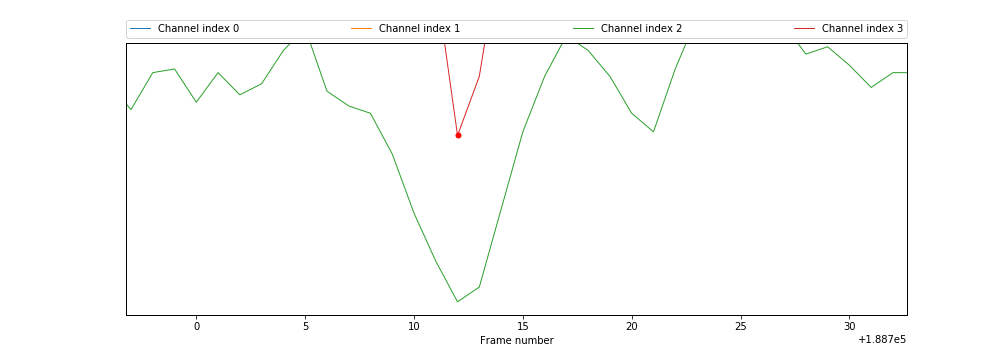

In [4]:
%matplotlib notebook
sp = np.loadtxt('spikes')
print(sp.shape)
plt.figure(figsize=(14,5))
for i, channel in enumerate(range(0, 4)):
    d = data[:,channel]
    plt.plot(d+i*100, label = "Channel index " + str(channel))
    inds = np.where(sp[:,0]==channel)[0]
    plt.plot(sp[inds,1], d[sp[inds,1].astype(int)]+i*100,'r.',ms=10)
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.xlim((187550,189250))
plt.yticks(())
plt.xlabel('Frame number')
plt.savefig('eventdetection.png', format='png', bbox_inches='tight')

In [8]:
# plot individual shapes, remove baseline (now stored in shape file at position 4)

In [9]:
plt.figure(figsize=(12,8))
f = open('shapes')
for i in range(16):
    plt.subplot(4,4,i+1)
    l = f.readline()
    line = l.split()
    ch = int(line[0])
    frame = int(line[1])
    amp = int(line[2])
    b = int(line[3])
    cutout = np.array(line[4:], dtype=int)
    d = data[ch,:]
    plt.plot(d[:frame+30]-b, 'k', lw=2)
    for i in range(int(len(cutout)/32)):
        plt.plot(np.arange(frame-30, frame+61), cutout[i*32+1:(i+1)*32]-b, label=cutout[i*32])
#     plt.legend()
    plt.xticks(())
    plt.yticks(())
    print(ch, frame, amp, len(cutout)/10, b)
f.close()

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (91,) and (31,)

In [10]:
filteredSpikes('spikes', 'shapes', 'count')

Number of filtered spikes = 150488
Time taken = 0:00:01.193539


In [11]:
localisation('filtered_shapes','chpos.npy', medians = True)

('Broken line =', 24421)
[0 0 0 0 0 0 0 0 0 0]
('Broken line =', 24422)
[0 0 0 0 0 0 0 0 0 0]
('Broken line =', 112262)
[0 0 0 0 0 0 0 0 0 0]
('Broken line =', 146942)
[0 0 0 0 0 0 0 0 0]
count2 = 146
empty string = 0
reference count = 7
zero amps =4
Time taken = 0:01:52.252048


In [3]:
waves = np.loadtxt('pca_cutouts')
# mean = np.mean(waves, axis=0)

<IPython.core.display.Javascript object>


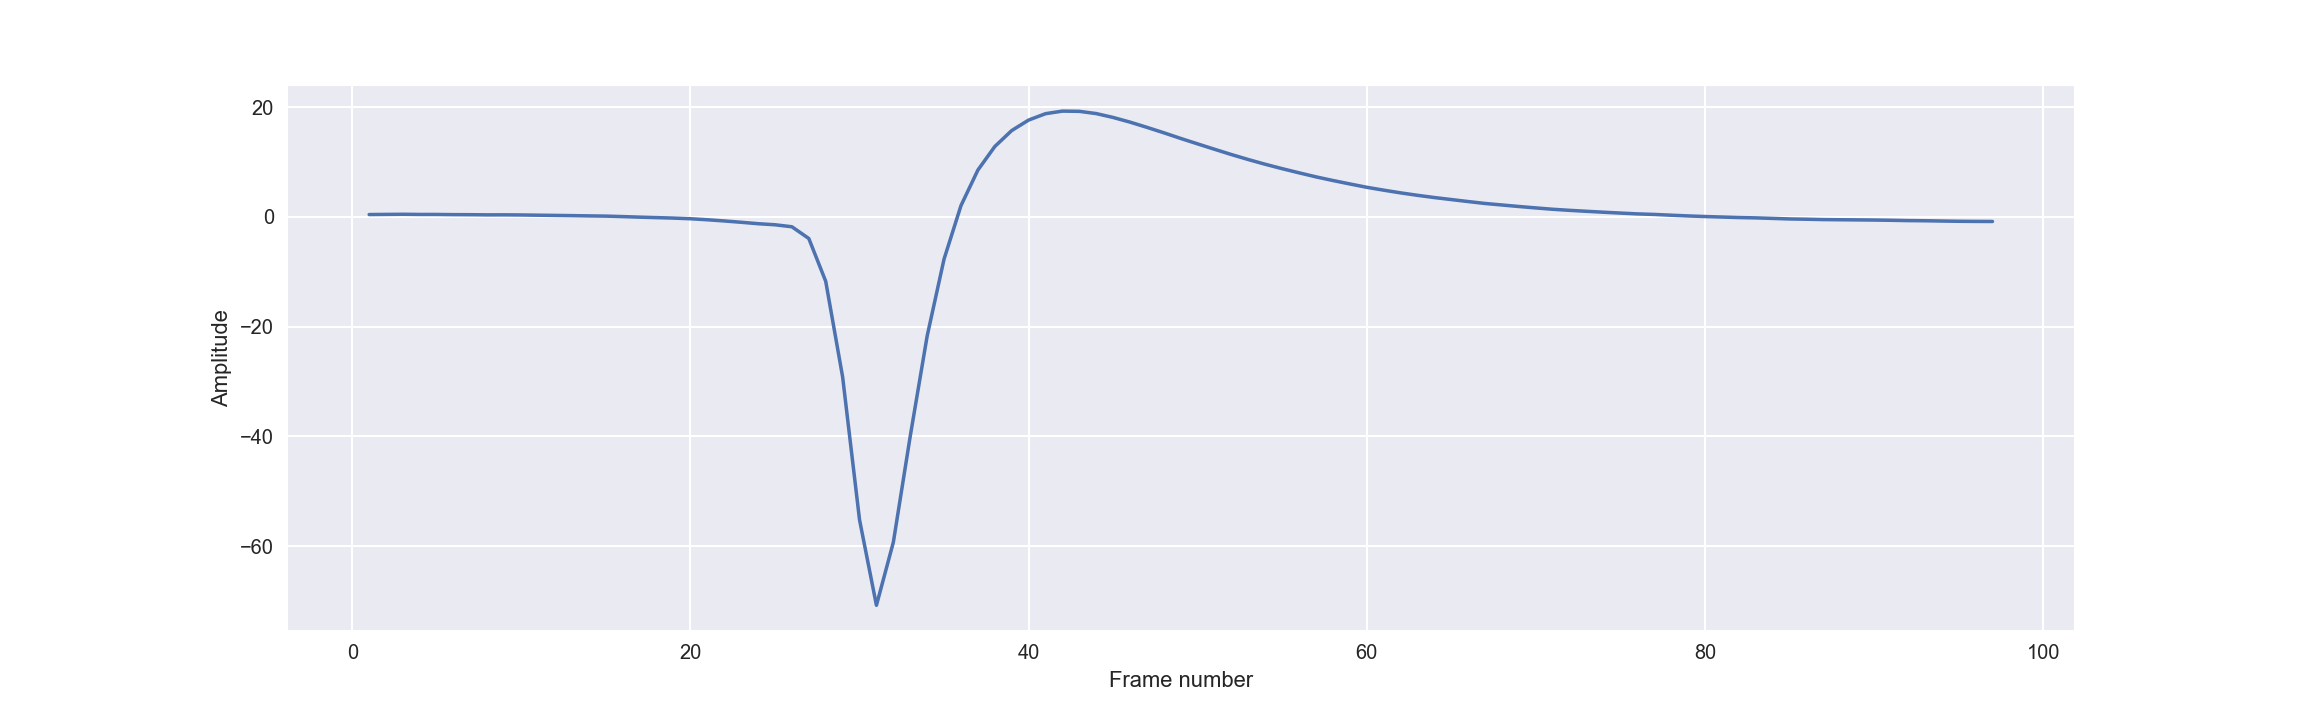

In [7]:
%matplotlib notebook
plt.figure(figsize=(16,5))
plt.plot(np.arange(len(mean))+1, mean)
plt.ylabel('Amplitude')
plt.xlabel('Frame number')
plt.savefig('meanwave', format='png', bbox_inches='tight')

<IPython.core.display.Javascript object>


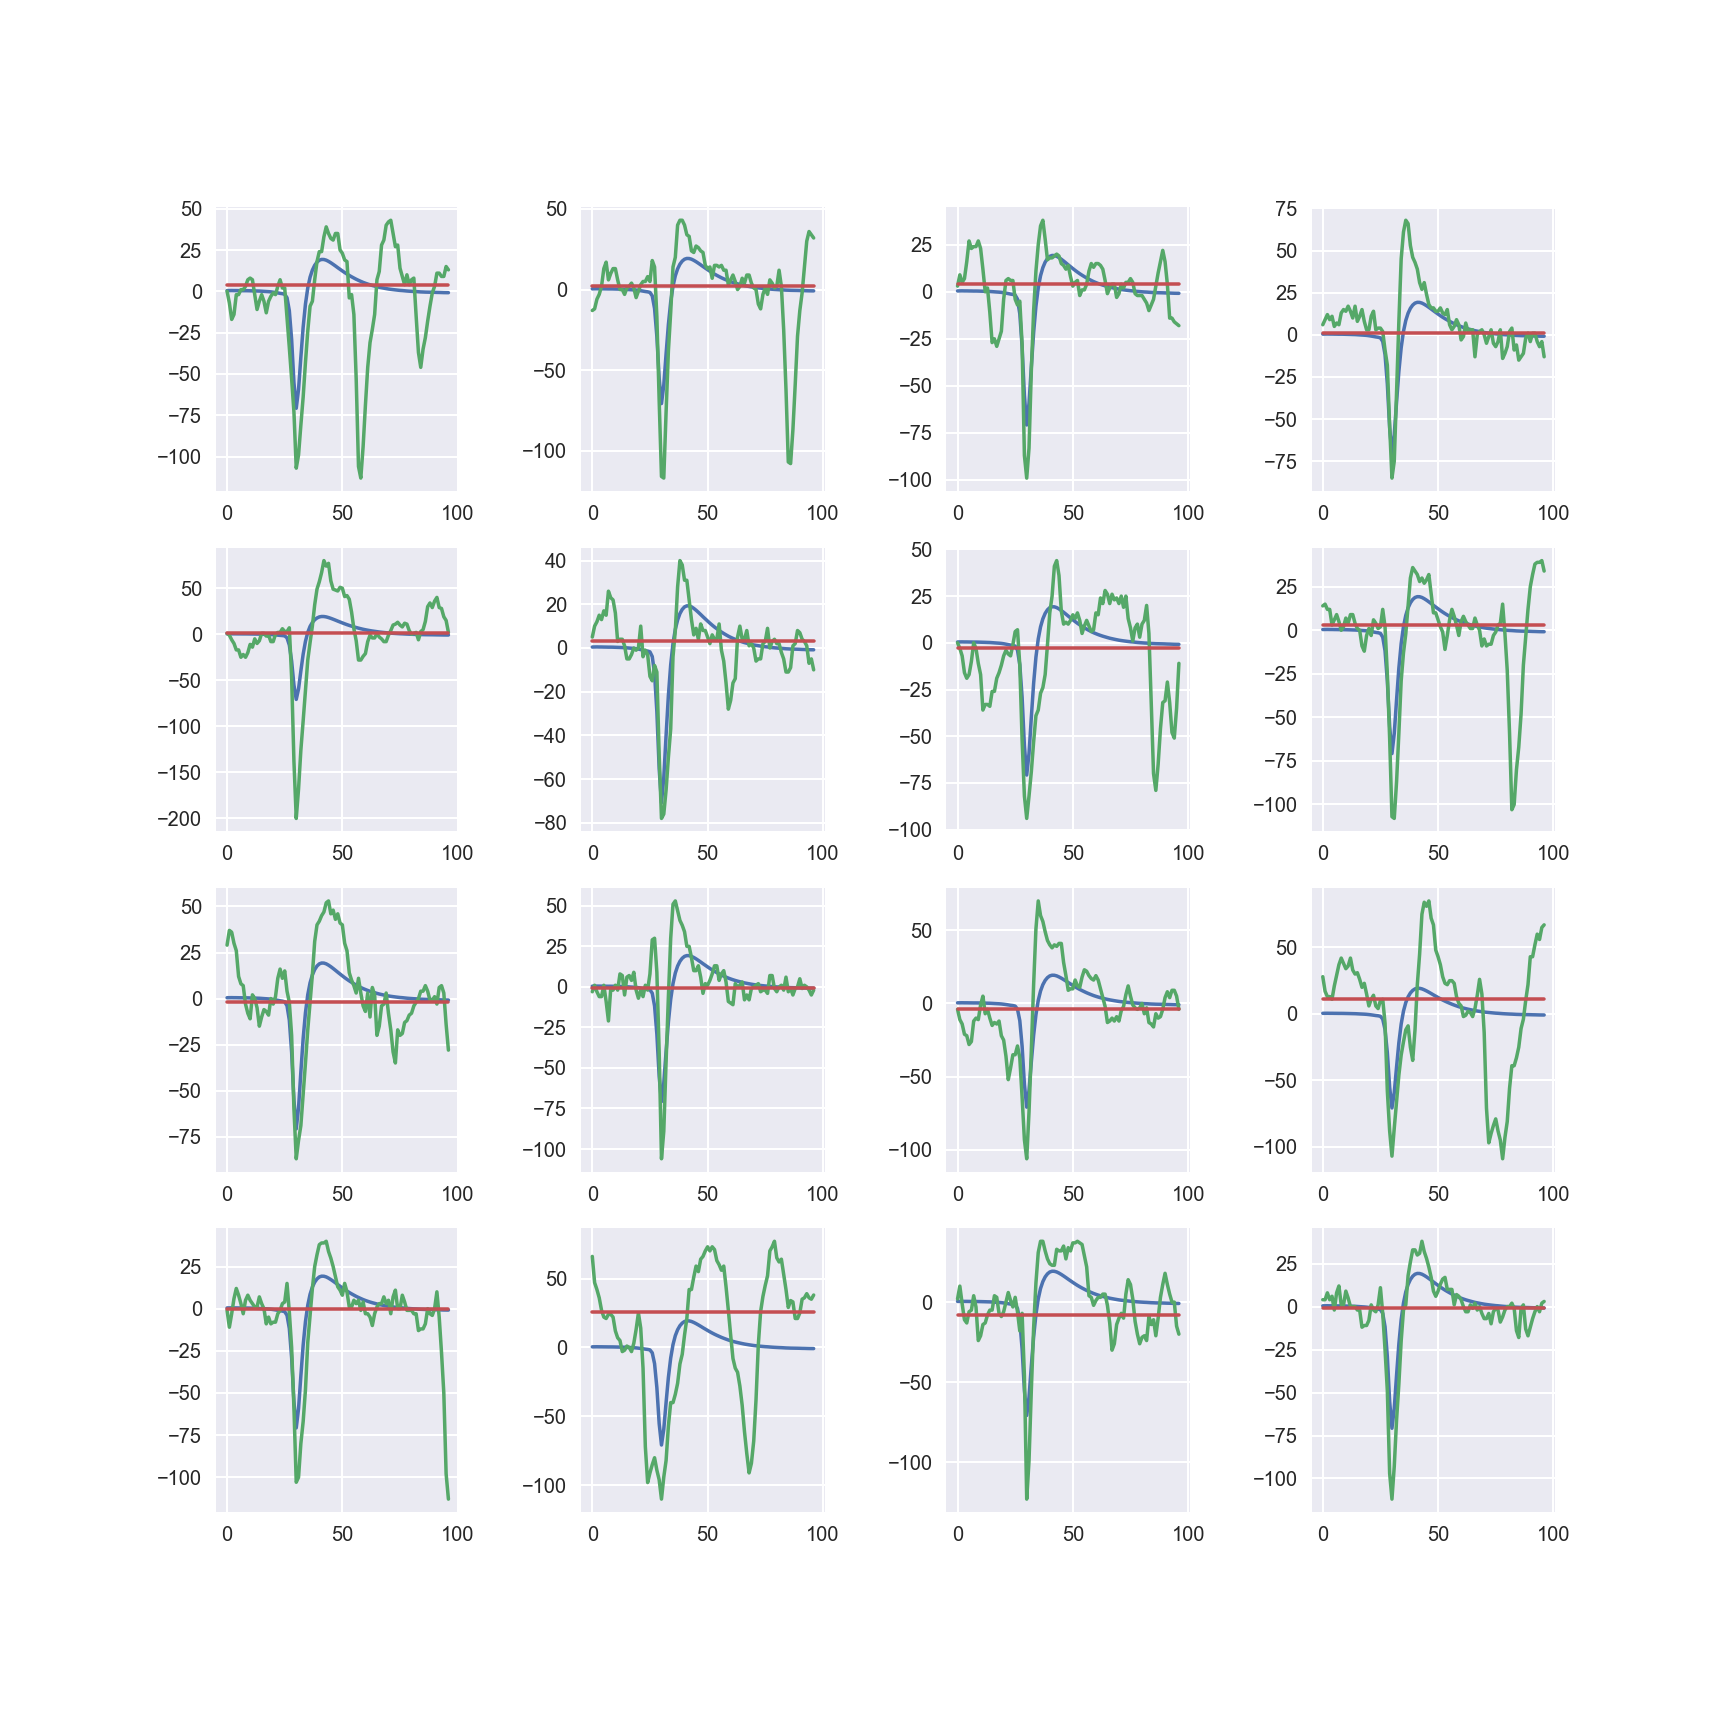

In [4]:
# plt.plot(np.arange(len(mean)), mean)
# plt.plot(np.arange(len(mean)), waves[37,:])
%matplotlib notebook
plt.figure(figsize=(12,12))
for cl in range(16):
    plt.subplot(4,4,cl+1)
    wave = waves[cl,:]
    plt.plot(np.arange(len(mean)), mean)
    plt.plot(np.arange(len(mean)), wave)
    baseline = np.median(np.hstack((wave[:15], wave[-36:])))
    plt.plot(np.arange(len(mean)), baseline*np.ones(len(mean)))
#     plt.xticks(())
#     plt.yticks(())
savefig('meanwavesplot', dpi='figure', format='png', bbox_inches='tight')

In [29]:
ls = np.loadtxt('local_spikes')
ls.shape

(150477, 2)

<IPython.core.display.Javascript object>


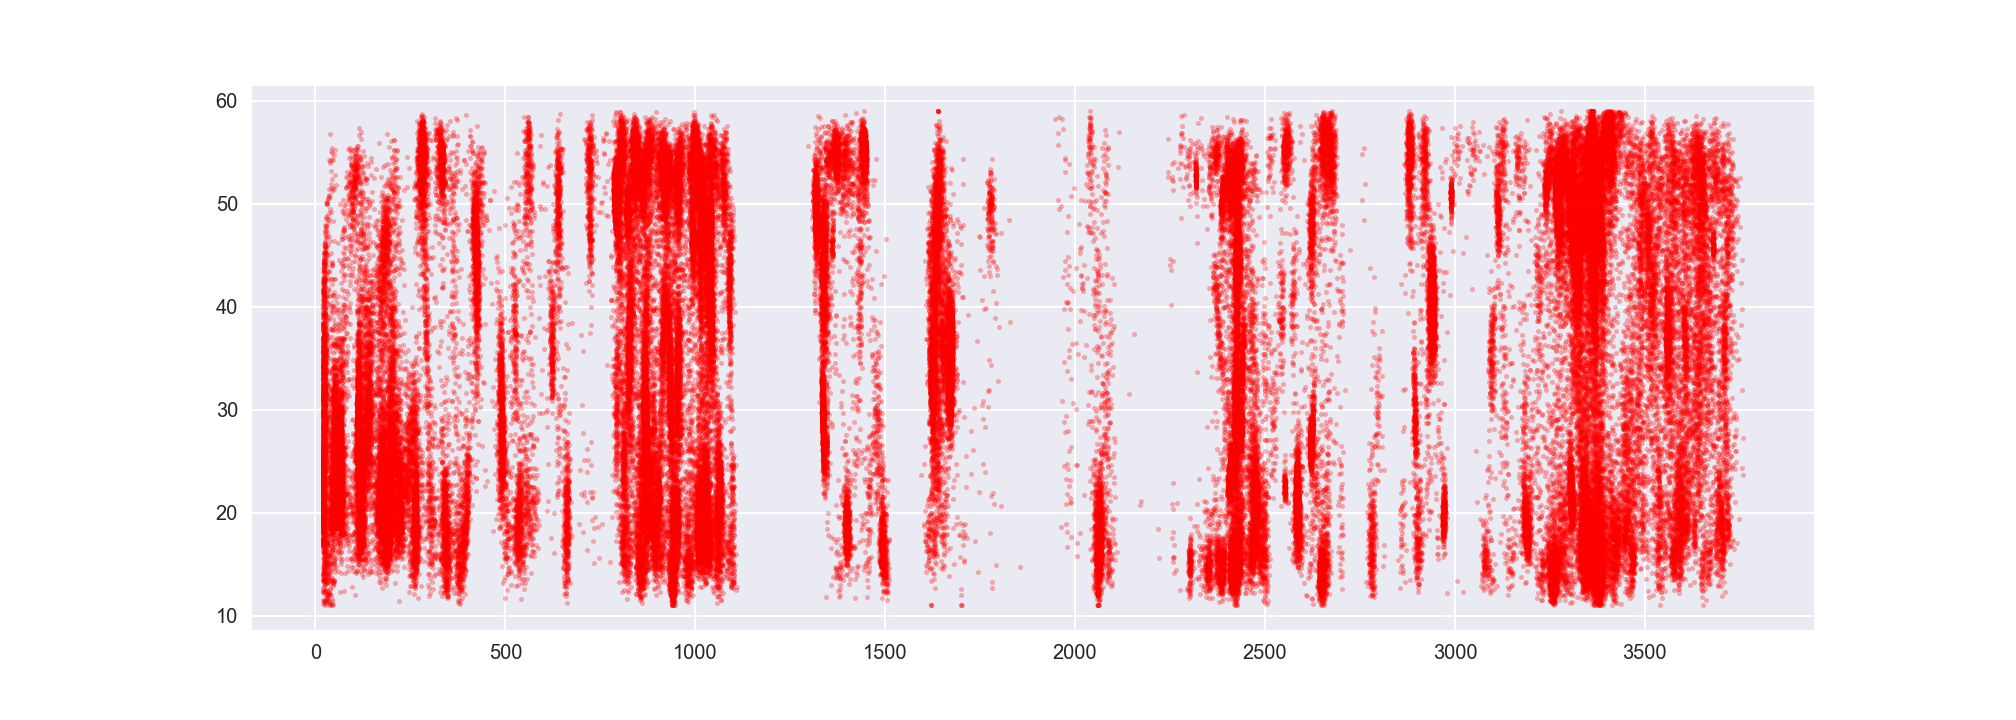

In [11]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.3)

<IPython.core.display.Javascript object>


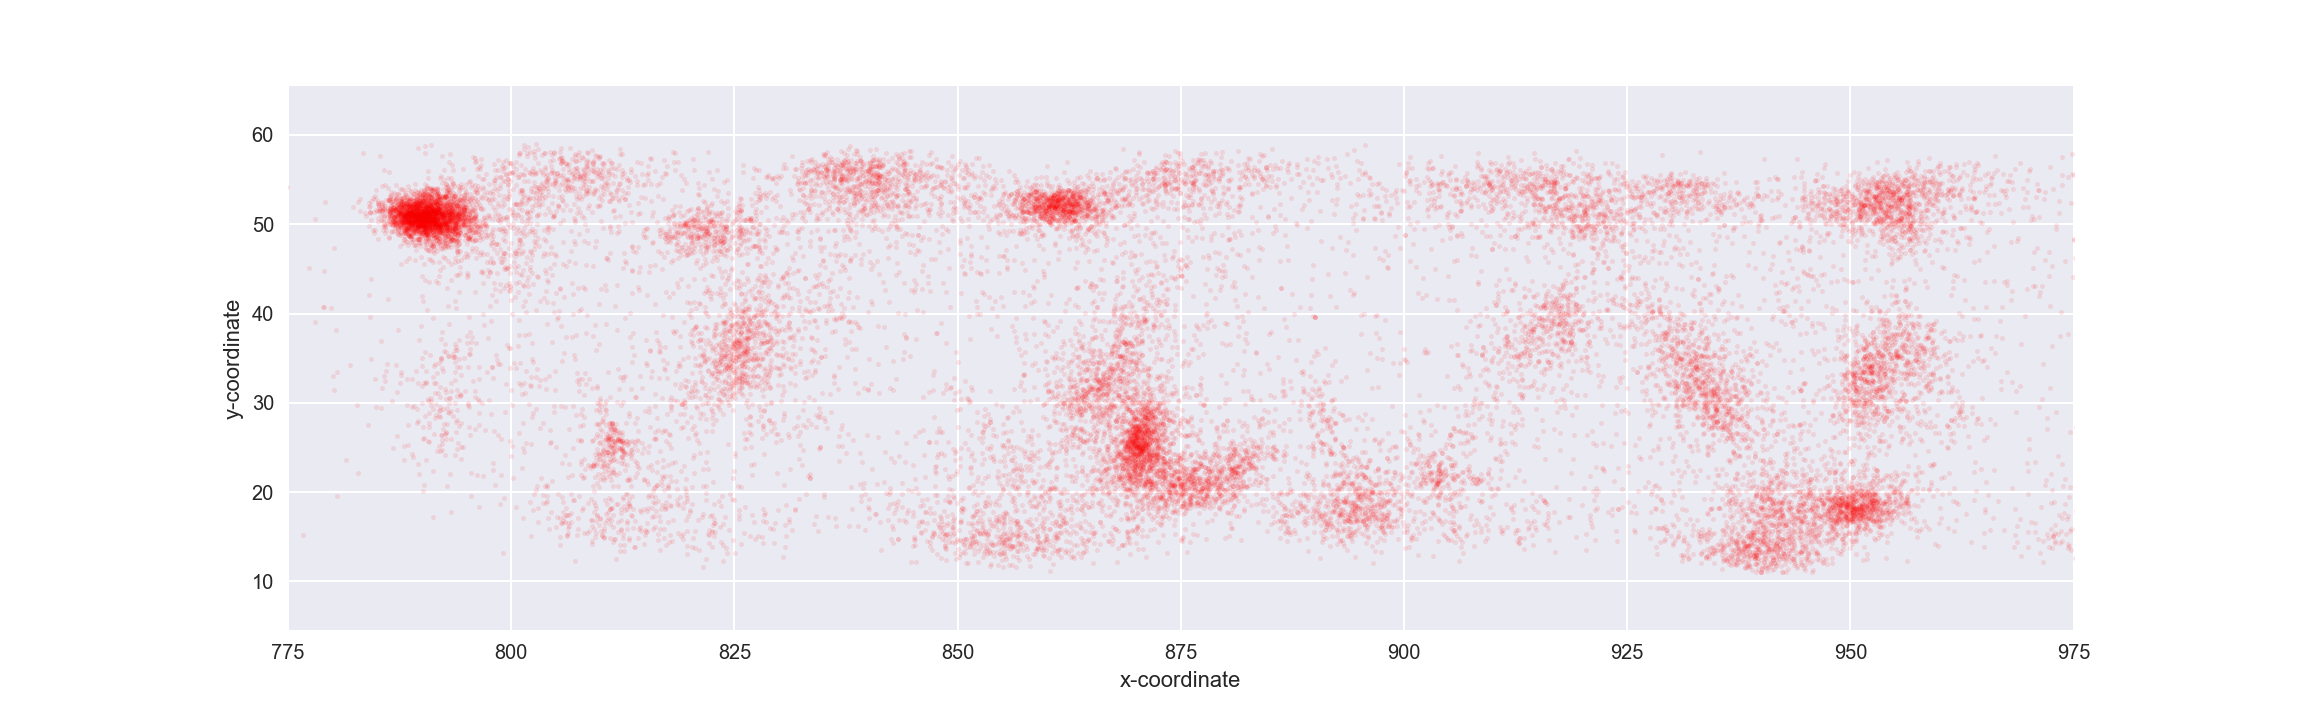

In [12]:
%matplotlib notebook
plt.figure(figsize=(16,5))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.1)
plt.axis('equal')
plt.xlim((775,975))
plt.ylim((10,60))
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

<IPython.core.display.Javascript object>


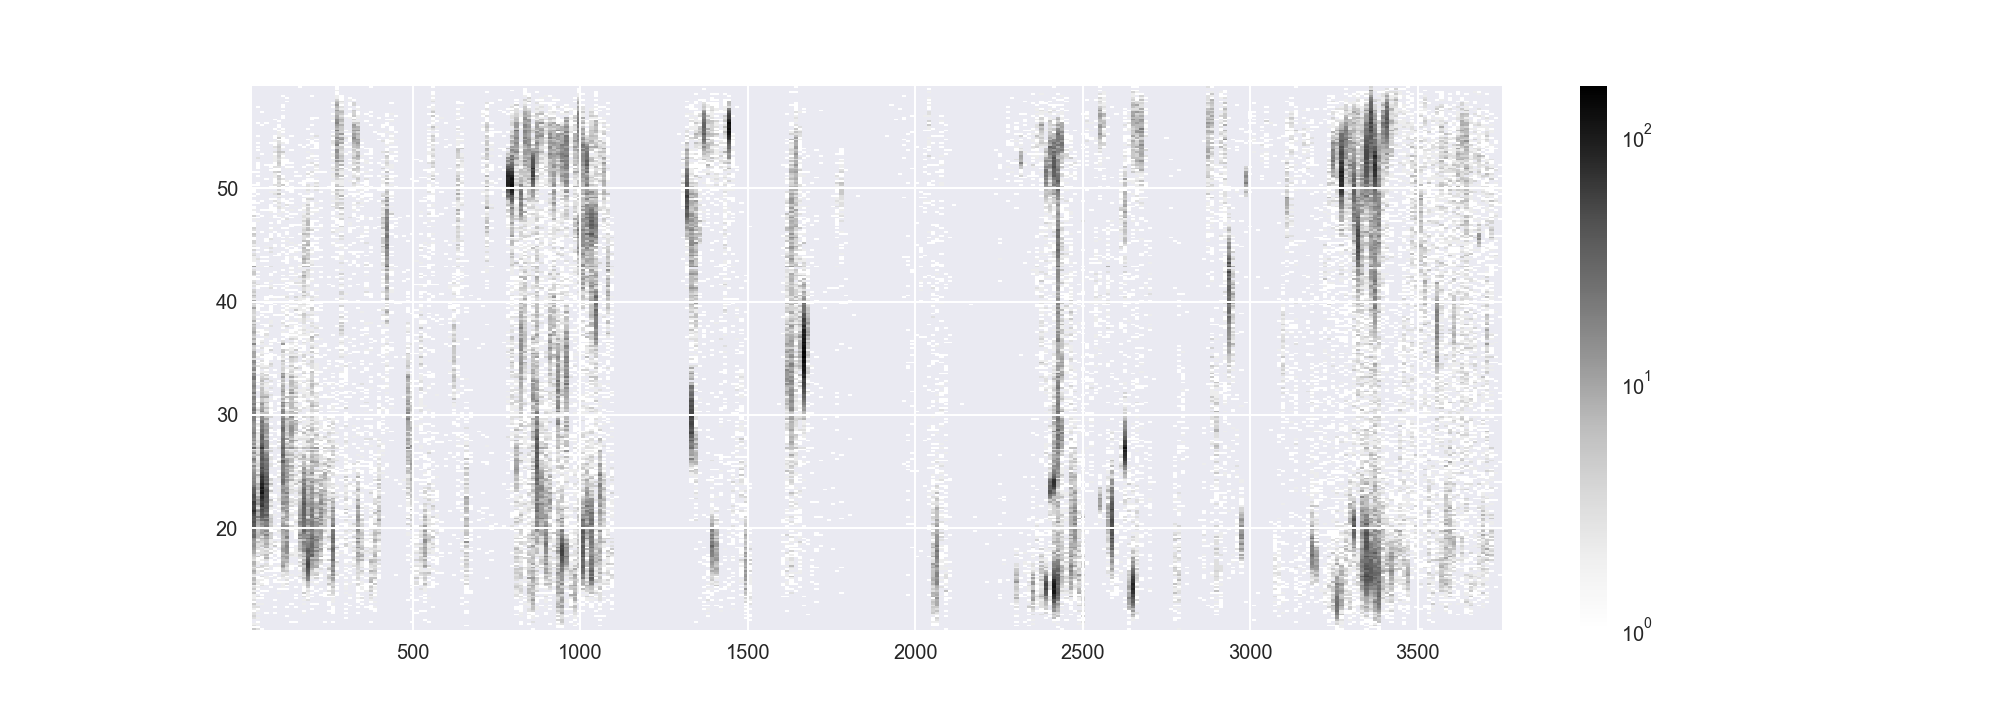

In [6]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.hist2d(ls[:,0], ls[:,1], bins=300, norm=LogNorm())
plt.colorbar()

In [8]:
n = len(ls)
n

148756

In [26]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(ls)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
# print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

('Number of estimated clusters:', 201)


<IPython.core.display.Javascript object>


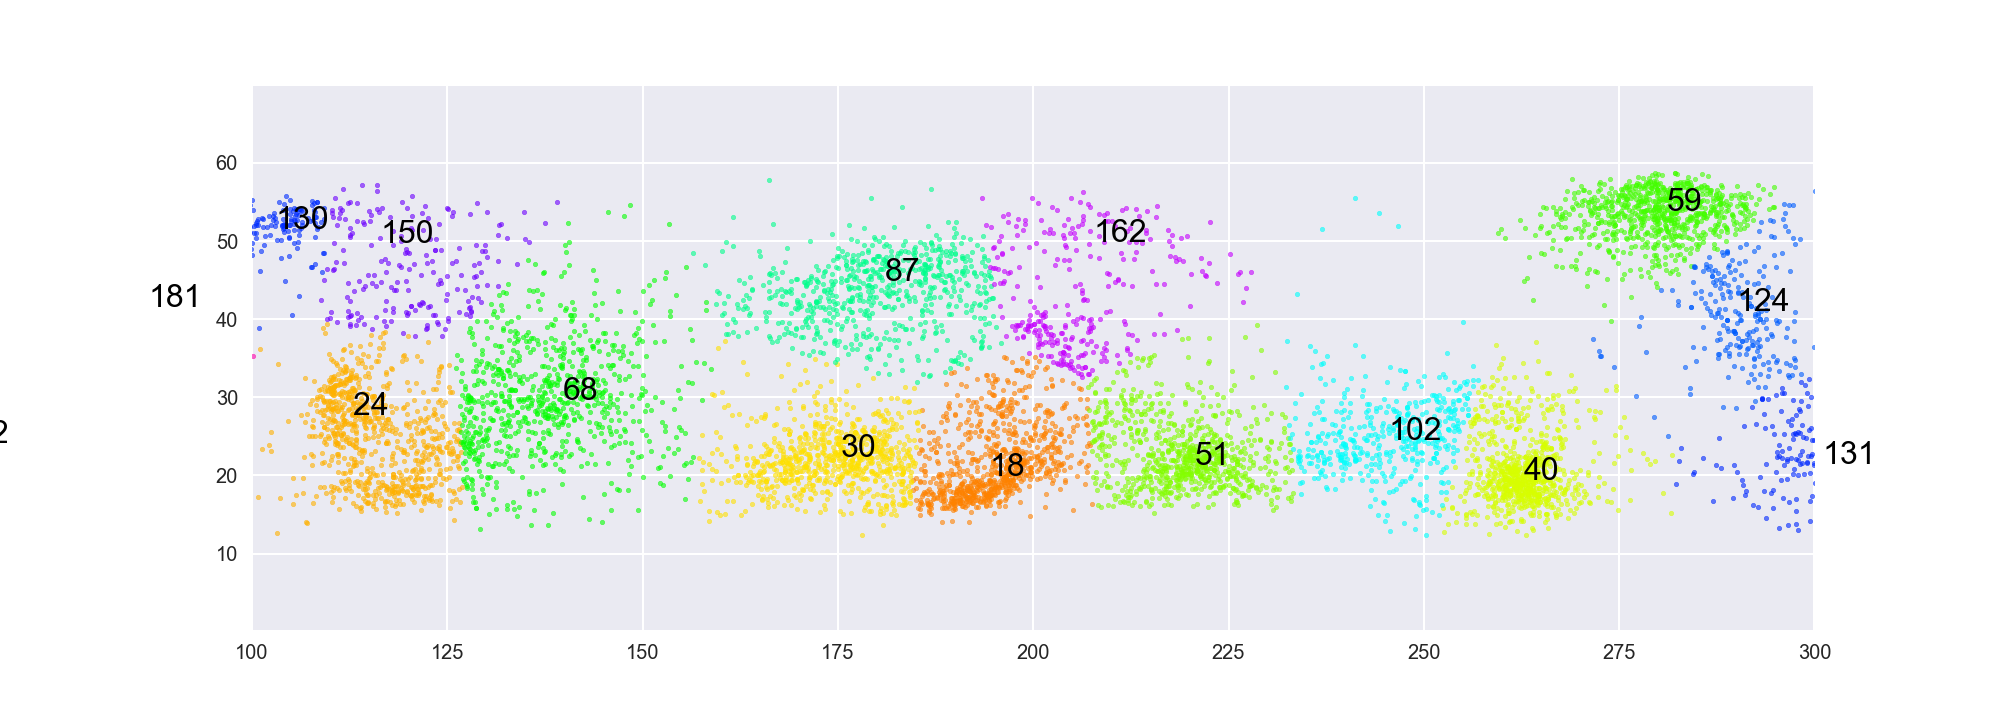

(100, 300)

In [27]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.arange(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:800]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=20, alpha=0.6)
    plt.text(cluster_centers[cl,0], cluster_centers[cl,1], str(cl), color='k', fontsize=16)

# plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))

In [12]:
cutouts = np.loadtxt('pca_cutouts', dtype=float, delimiter=' ' )
cutouts.shape

(150477, 60)

<IPython.core.display.Javascript object>


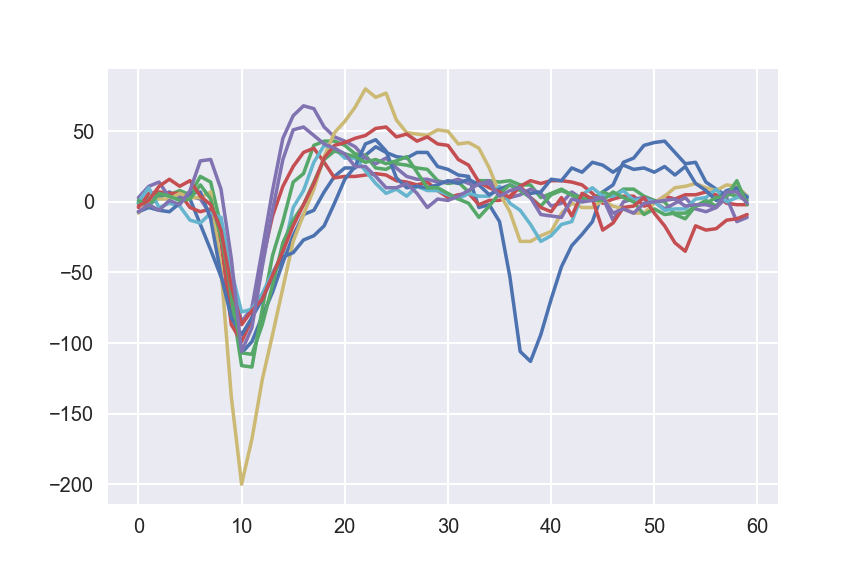

In [5]:
%matplotlib notebook
for i in range(10):
    plt.plot(np.arange(60), cutouts[i])

In [15]:
pca = PCA(n_components=2, whiten=True)
cutouts_pca = pca.fit_transform(cutouts)
cutouts_pca.shape

(150477, 2)

<IPython.core.display.Javascript object>


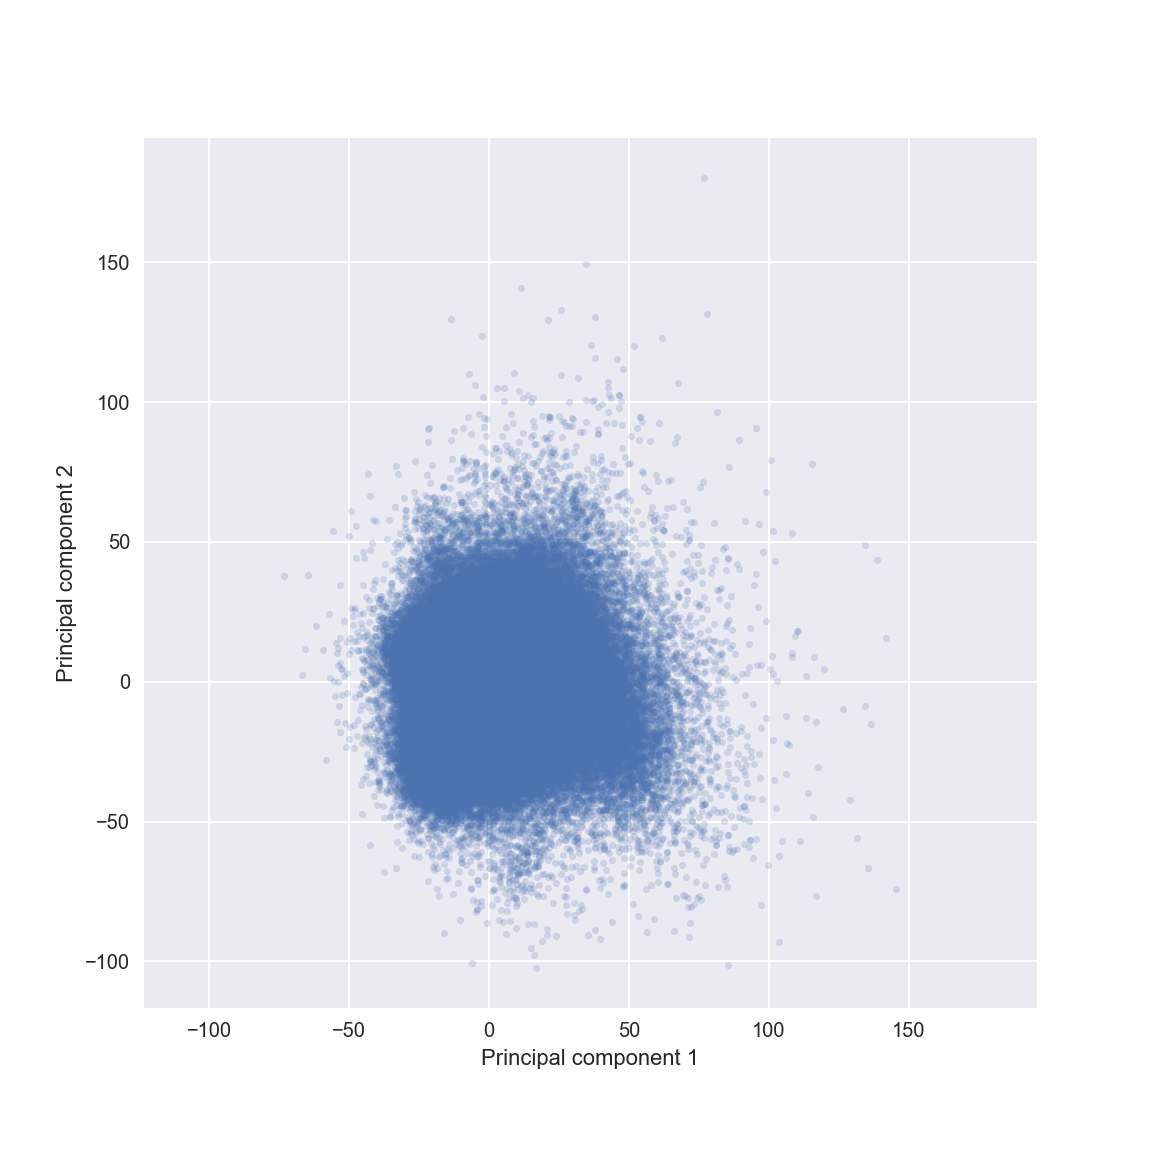

Mean = [  7.92123178e-18  -5.93860898e-17]
Std = [ 1.  1.]


In [35]:
%matplotlib notebook
plt.figure(figsize=(8,8))
plt.plot(20*cutouts_pca[:,0], 20*cutouts_pca[:,1],'.', alpha=0.2)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.axis('equal')
plt.savefig('first2pcs.png', dpi='figure', format='png', bbox_inches='tight')
print("Mean = " + str(np.mean(cutouts_pca, axis=0)))
print("Std = " + str(np.std(cutouts_pca, axis=0)))

<IPython.core.display.Javascript object>


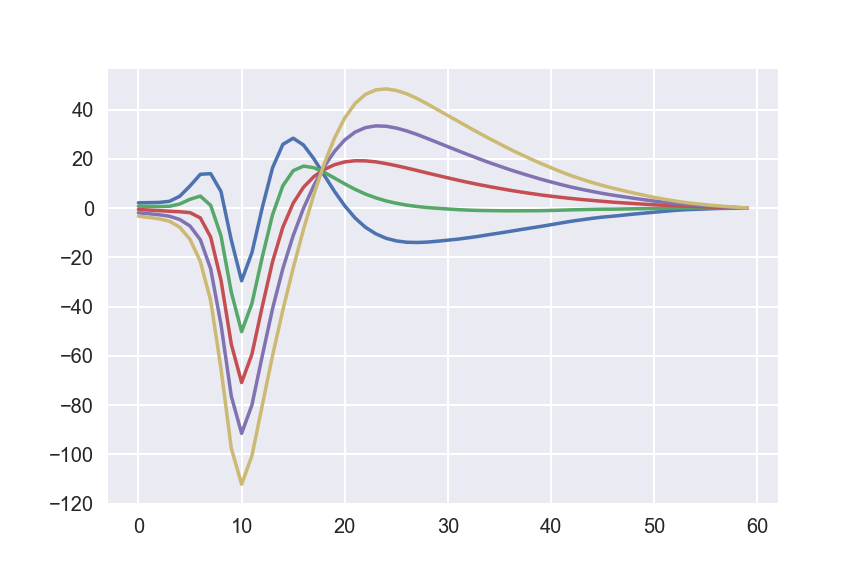

In [8]:
plt.figure()
pc1, pc2 = pca.components_
array = np.vstack((np.arange(-2,3),np.zeros(5))).T
data = pca.inverse_transform(array)
for i in range(5):
    plt.plot(np.arange(len(data[i])),data[i])

<IPython.core.display.Javascript object>


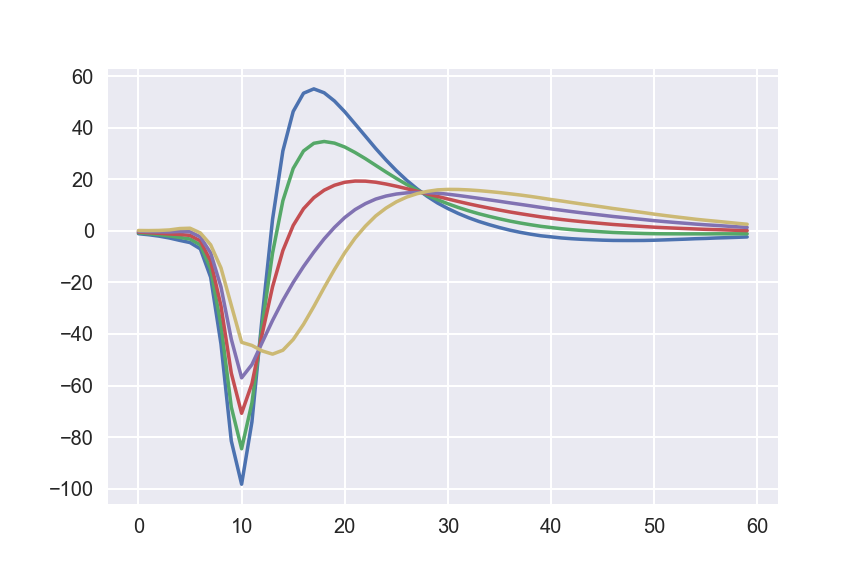

In [9]:
plt.figure()
array = np.vstack((np.zeros(5),np.arange(-2,3))).T
data = pca.inverse_transform(array)
for i in range(5):
    plt.plot(np.arange(len(data[i])),data[i])

In [40]:
fig =plt.figure()
pca1 = PCA(n_components=16, whiten=True)
pca1.fit(cutouts)
array = np.zeros((5,16))
plt.figure(figsize=(12,12))
for cl in range(16):
    plt.subplot(4,4,cl+1)
    plt.title("PC " + str(cl+1))
    array = np.zeros((5,16))
    array[:,cl] = np.arange(-2,3)
    data = pca1.inverse_transform(array)
    for i in range(5):
        plt.plot(np.arange(len(data[i])),data[i], label = str(np.arange(-2,3)[i]))
    plt.xticks(())
    plt.yticks(())
fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.0)
plt.savefig('principalcomponents.png', dpi='figure', format='png', bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: legend() takes at least 3 arguments (1 given)

<IPython.core.display.Javascript object>


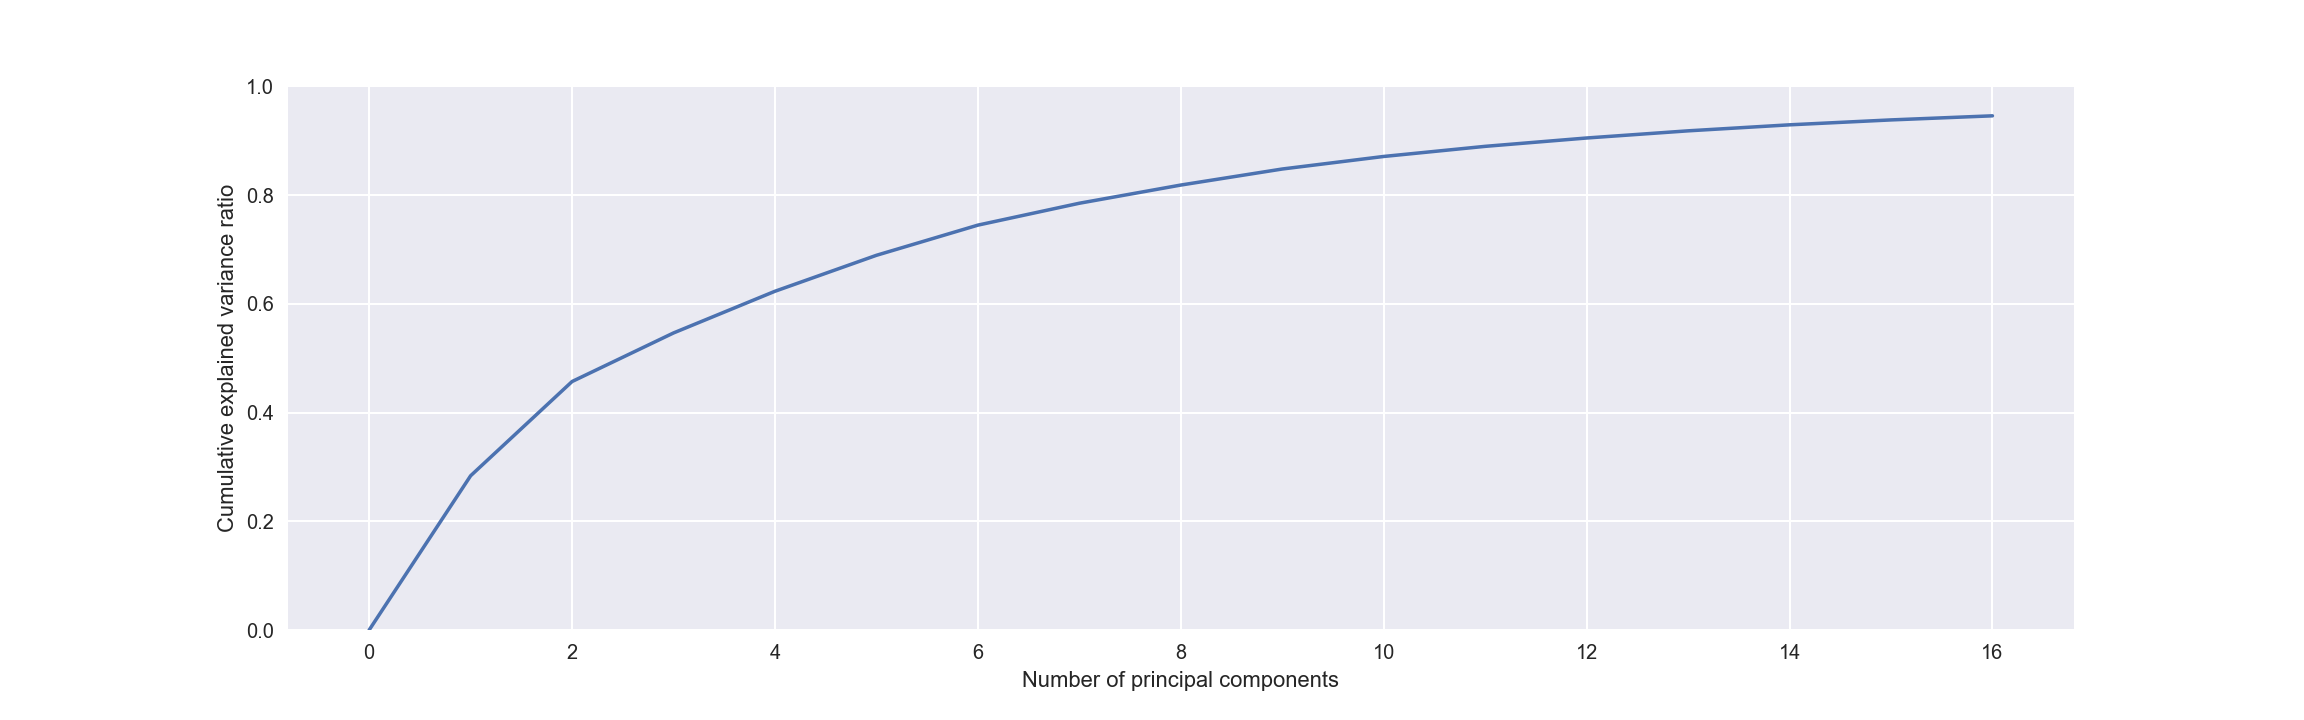

In [23]:
%matplotlib notebook
plt.figure(figsize=(16,5))
plt.plot(np.arange(0,17), np.hstack((0,np.cumsum(pca1.explained_variance_ratio_))))
plt.ylim((0,1))
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Number of principal components')
plt.savefig('explainedratio.png', dpi='figure', format='png', bbox_inches='tight')

In [ ]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(20*cutouts_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
# print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

In [ ]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.arange(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:800]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=20, alpha=0.6)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))

In [30]:
fourvec = np.hstack((ls, 20*cutouts_pca))

In [31]:
fourvec.shape

(150477, 4)

In [32]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(fourvec)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
# print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

('Number of estimated clusters:', 267)


In [24]:
labels

array([252,  65,  17, ...,  27,   7,  41])

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = []
for i in range(len(fourvec)):
    y_pred.append(cluster_centers[labels[i]])
y_pred = np.asarray(y_pred)
mse_array = []
for j in range(len(cluster_centers)):
    inds = np.where(labels == j)
    mse = mean_squared_error(fourvec[inds], y_pred[inds])
    mse_array.append(sqrt(mse))
mse1 = mean_squared_error(fourvec, y_pred)
print("Overall mse = " + str(sqrt(mse1)))

Overall mse = 8.34050498698


In [51]:
mean = np.mean(mse_array)
median = np.median(mse_array)
stdev = np.std(mse_array)
print('mean = ' + str(mean))
print('median = ' + str(median))
print('stdev = ' + str(stdev))

mean = 8.20347328902
median = 7.80730517447
stdev = 2.46524083735


<IPython.core.display.Javascript object>


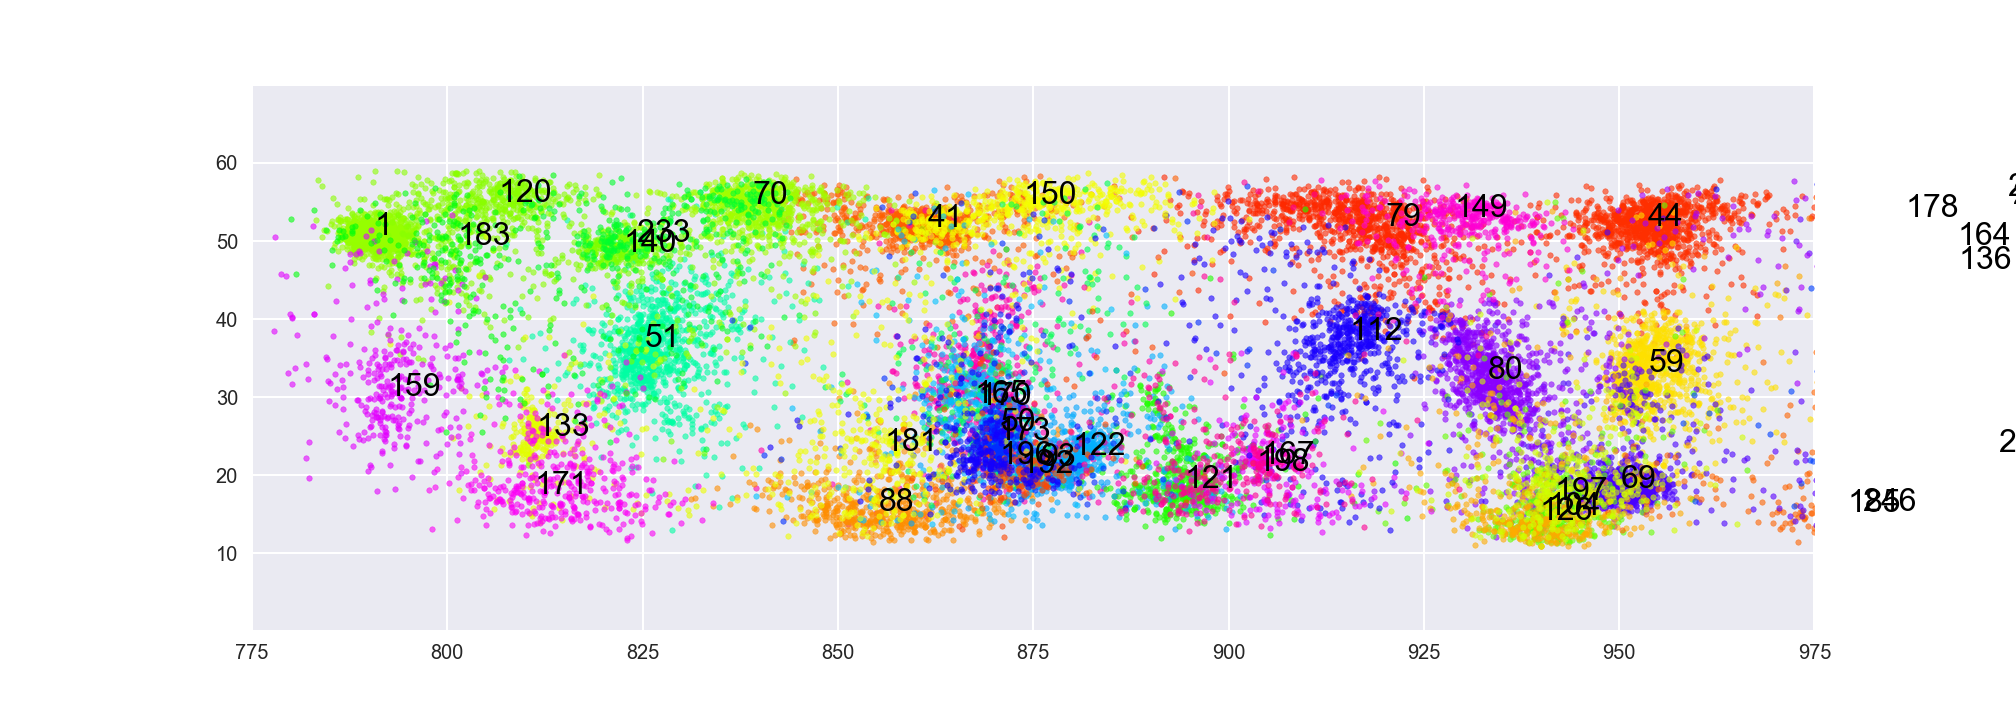

(775, 975)

In [22]:
%matplotlib notebook
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.random.permutation(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:1000]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=30, alpha=0.6)
    plt.text(cluster_centers[cl,0], cluster_centers[cl,1], str(cl), color='k', fontsize=16)

# plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((775,975))

<IPython.core.display.Javascript object>


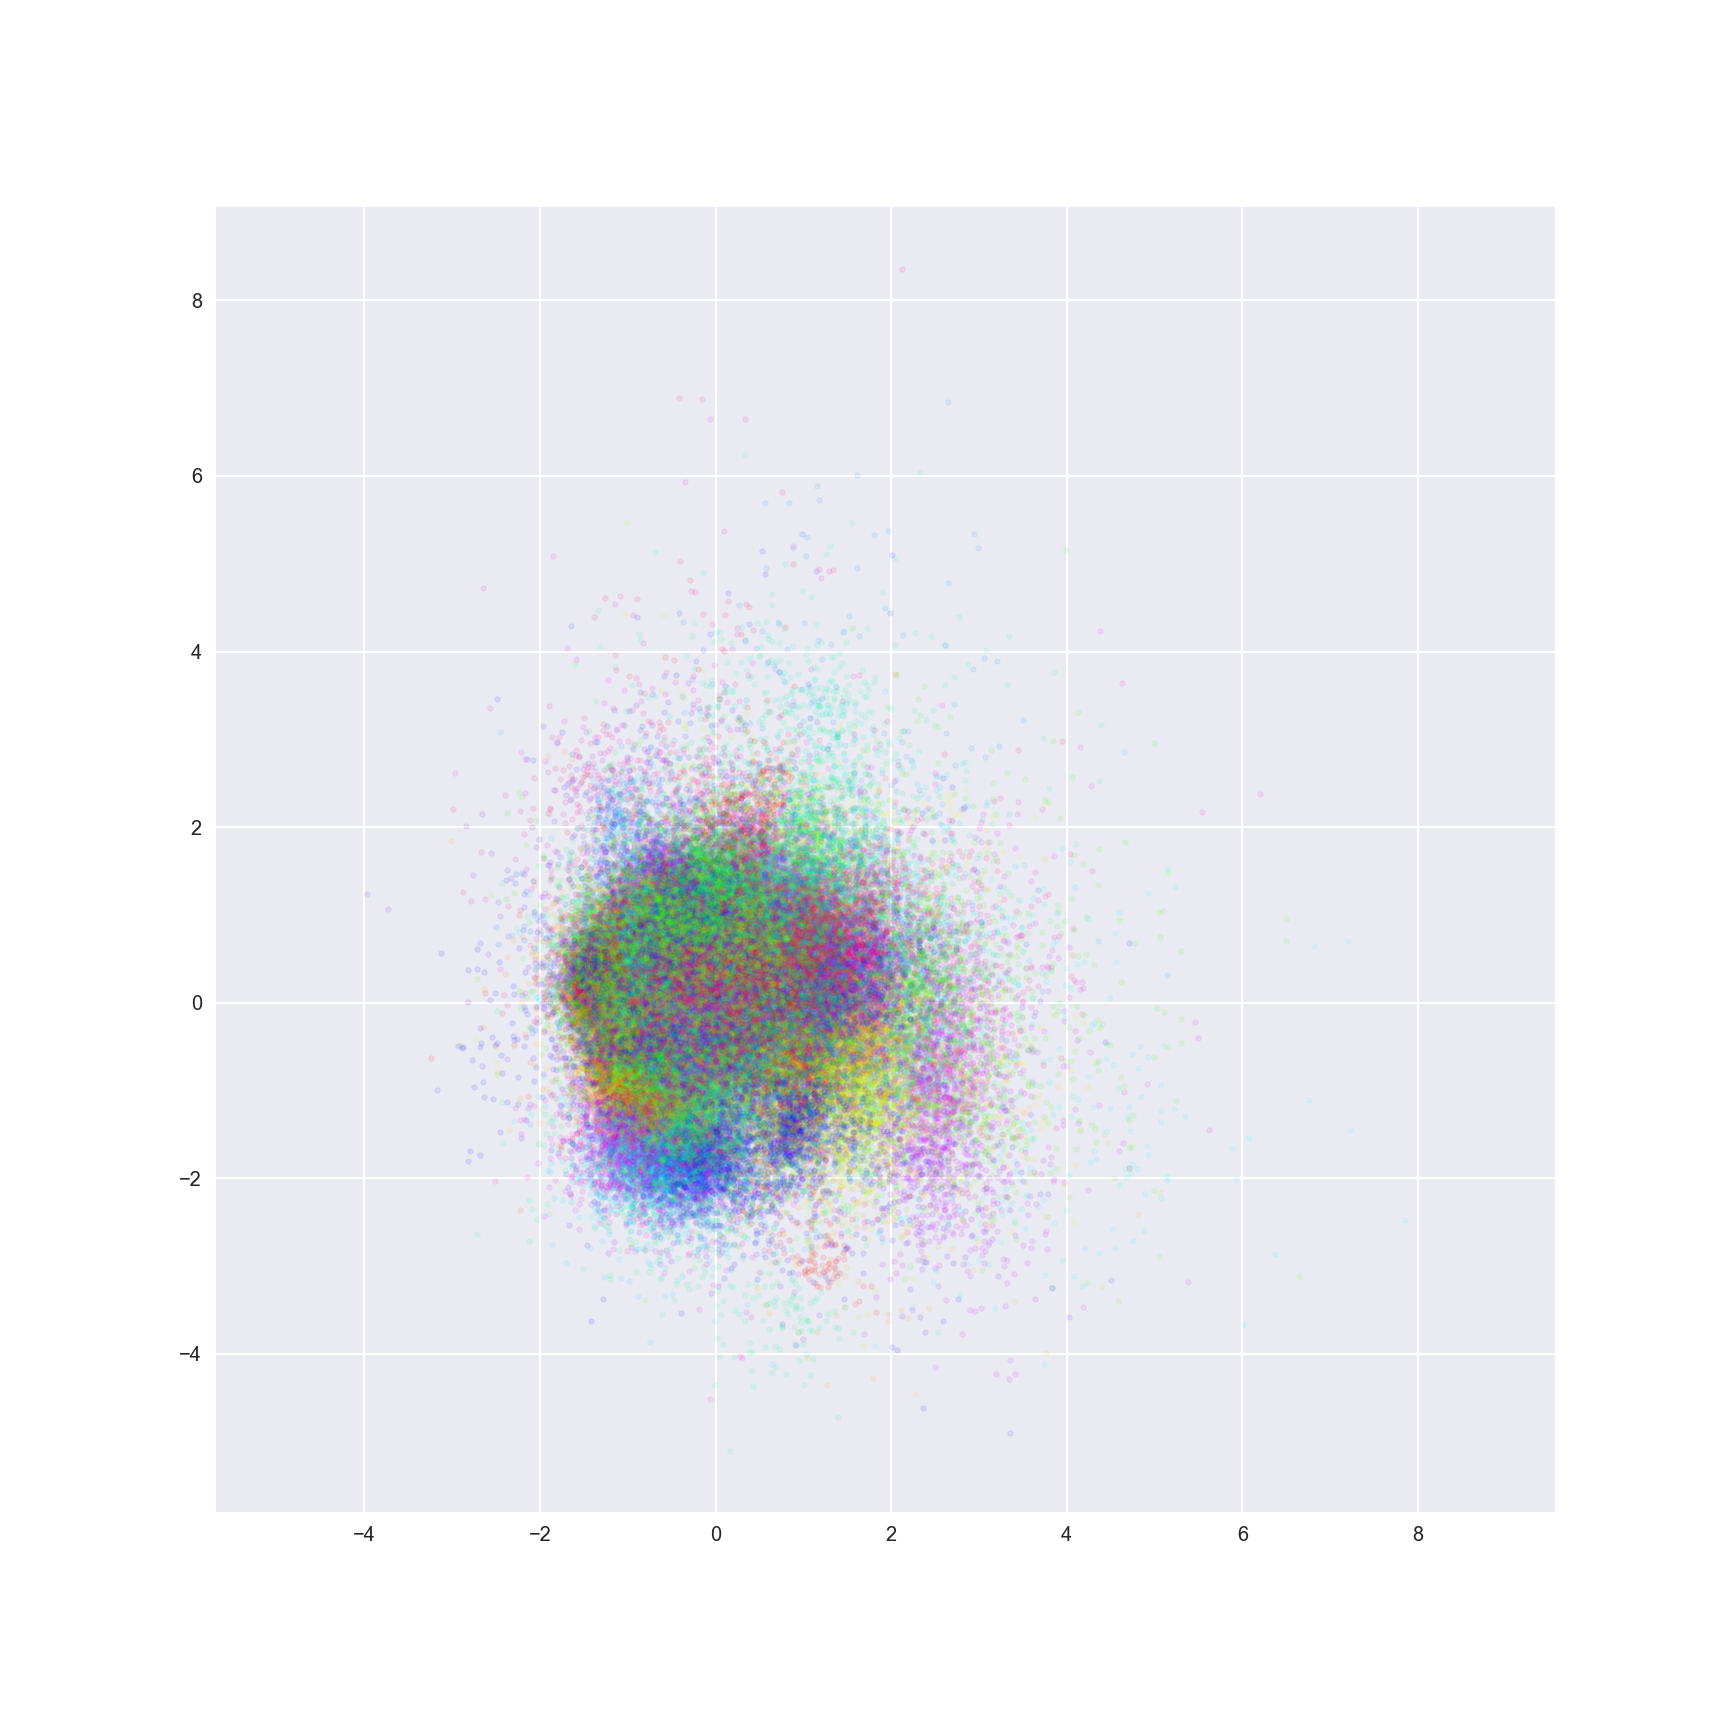

(-4.5895268819827058,
 8.4627827910244946,
 -5.7998103214525507,
 9.0583739301352644)

In [20]:
%matplotlib notebook
plt.figure(figsize=(12,12))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.random.permutation(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:1000]
    plt.scatter(cutouts_pca[inds,0], cutouts_pca[inds,1], marker='.', color = colors[cl],s=30, alpha=0.1)

# plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')

<IPython.core.display.Javascript object>


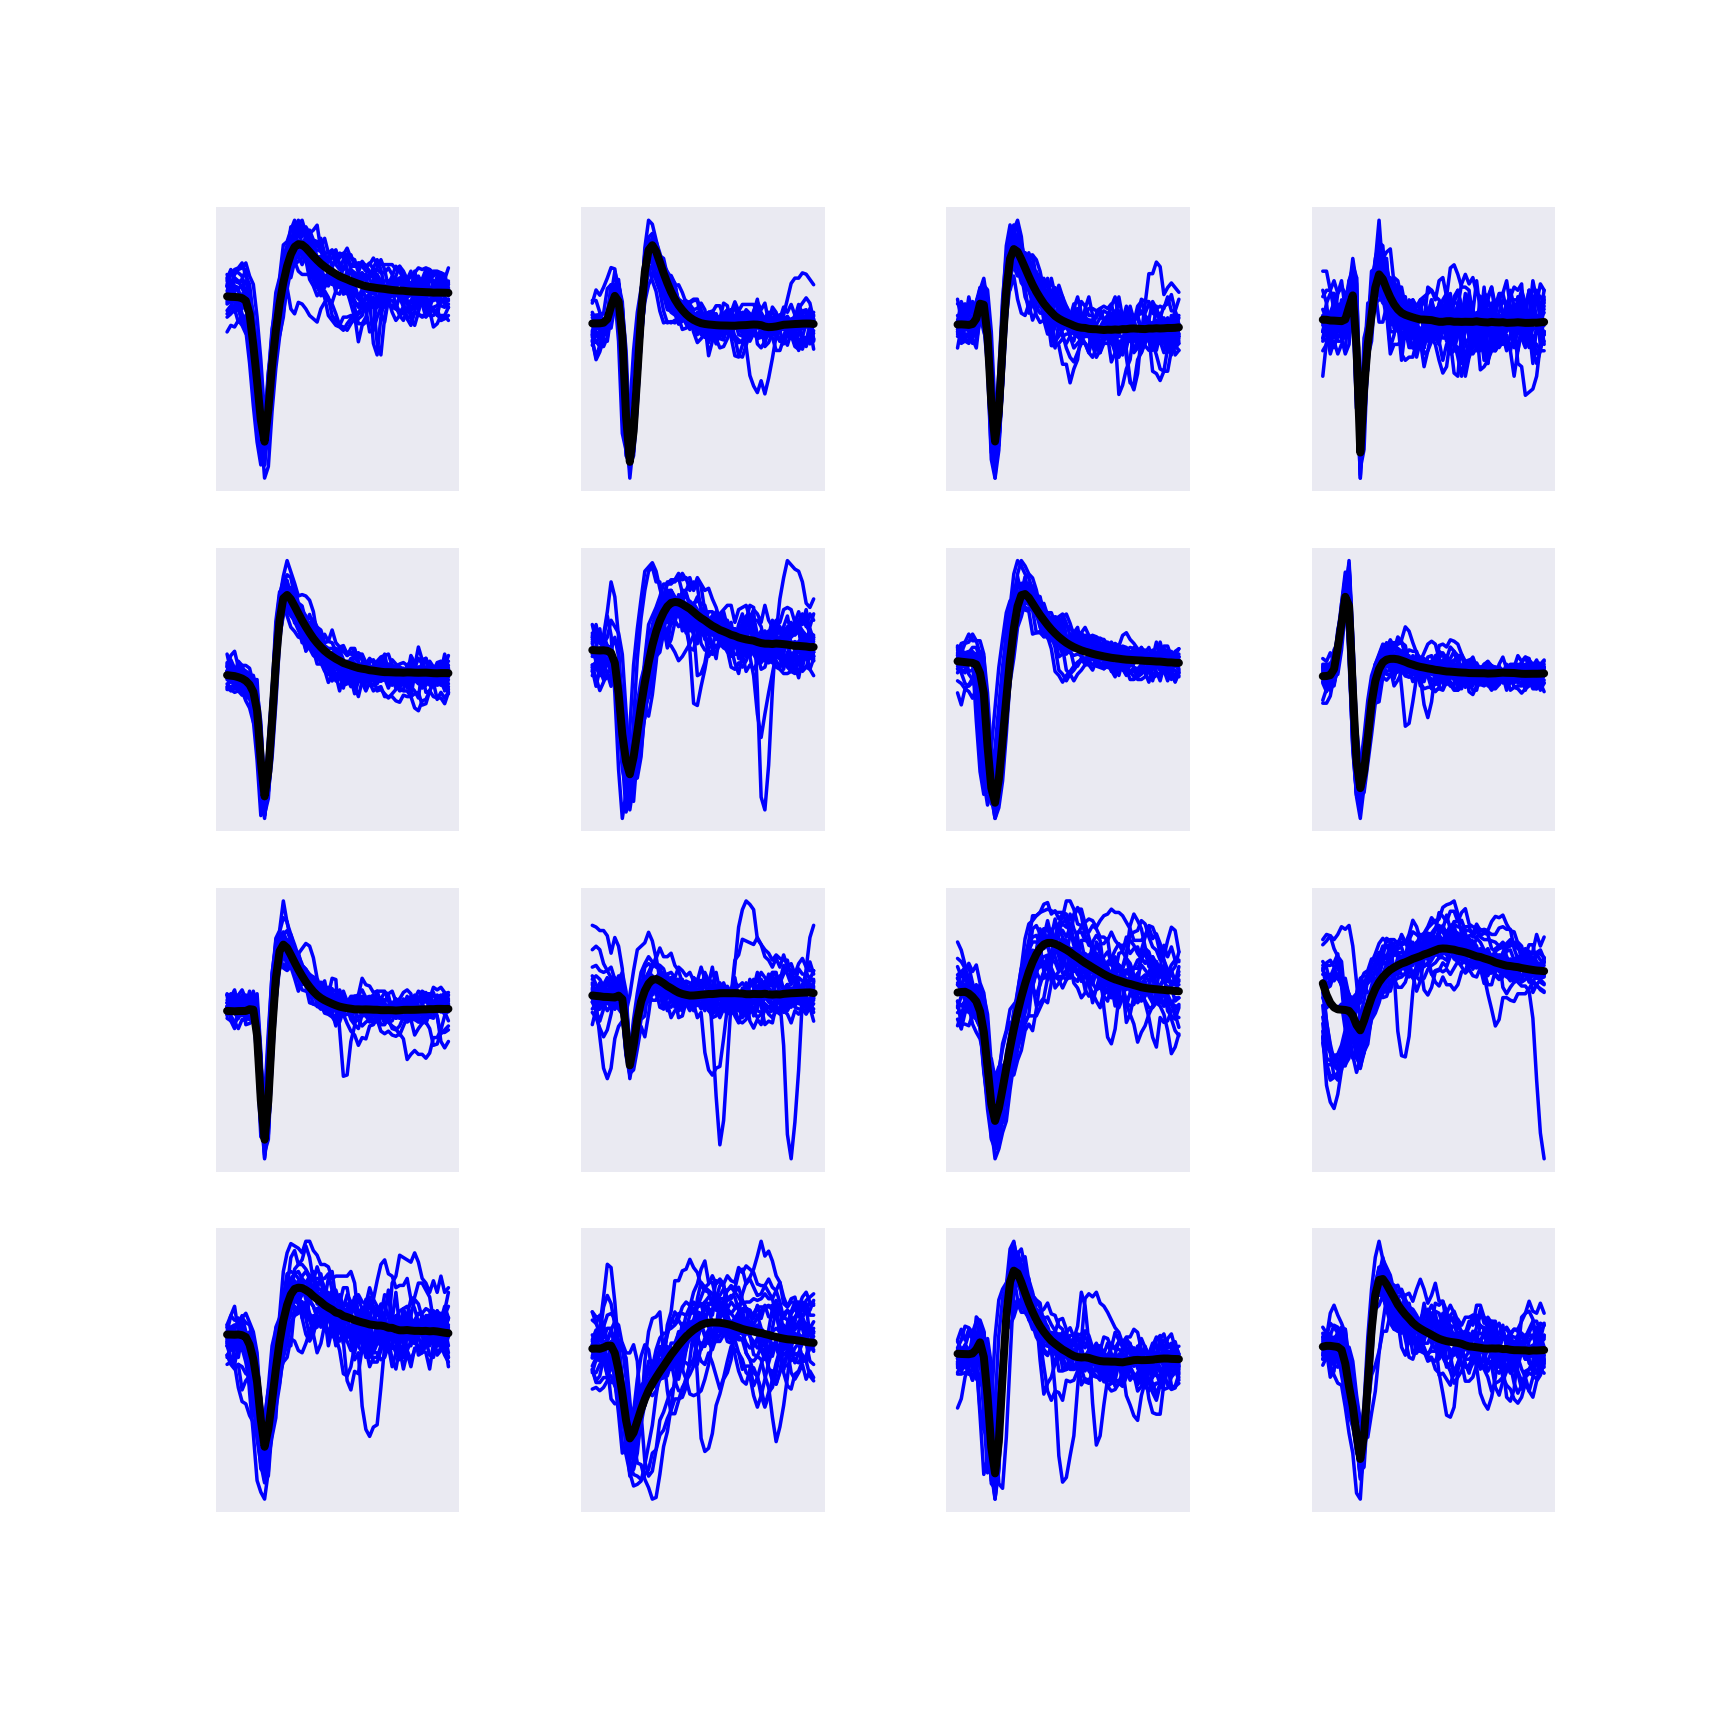

In [33]:
plt.figure(figsize=(12,12))
for cl in range(16):
    plt.subplot(4,4,cl+1)
    inds = np.where(labels==cl)[0]
    plt.plot(cutouts[inds[:20],:].T,'b');
    plt.plot(np.mean(cutouts[inds,:],axis=0),'k', lw=4);
    plt.xticks(())
    plt.yticks(())
plt.savefig('clustermeanwaves.png', dpi='figure', format='png', bbox_inches='tight')

<IPython.core.display.Javascript object>


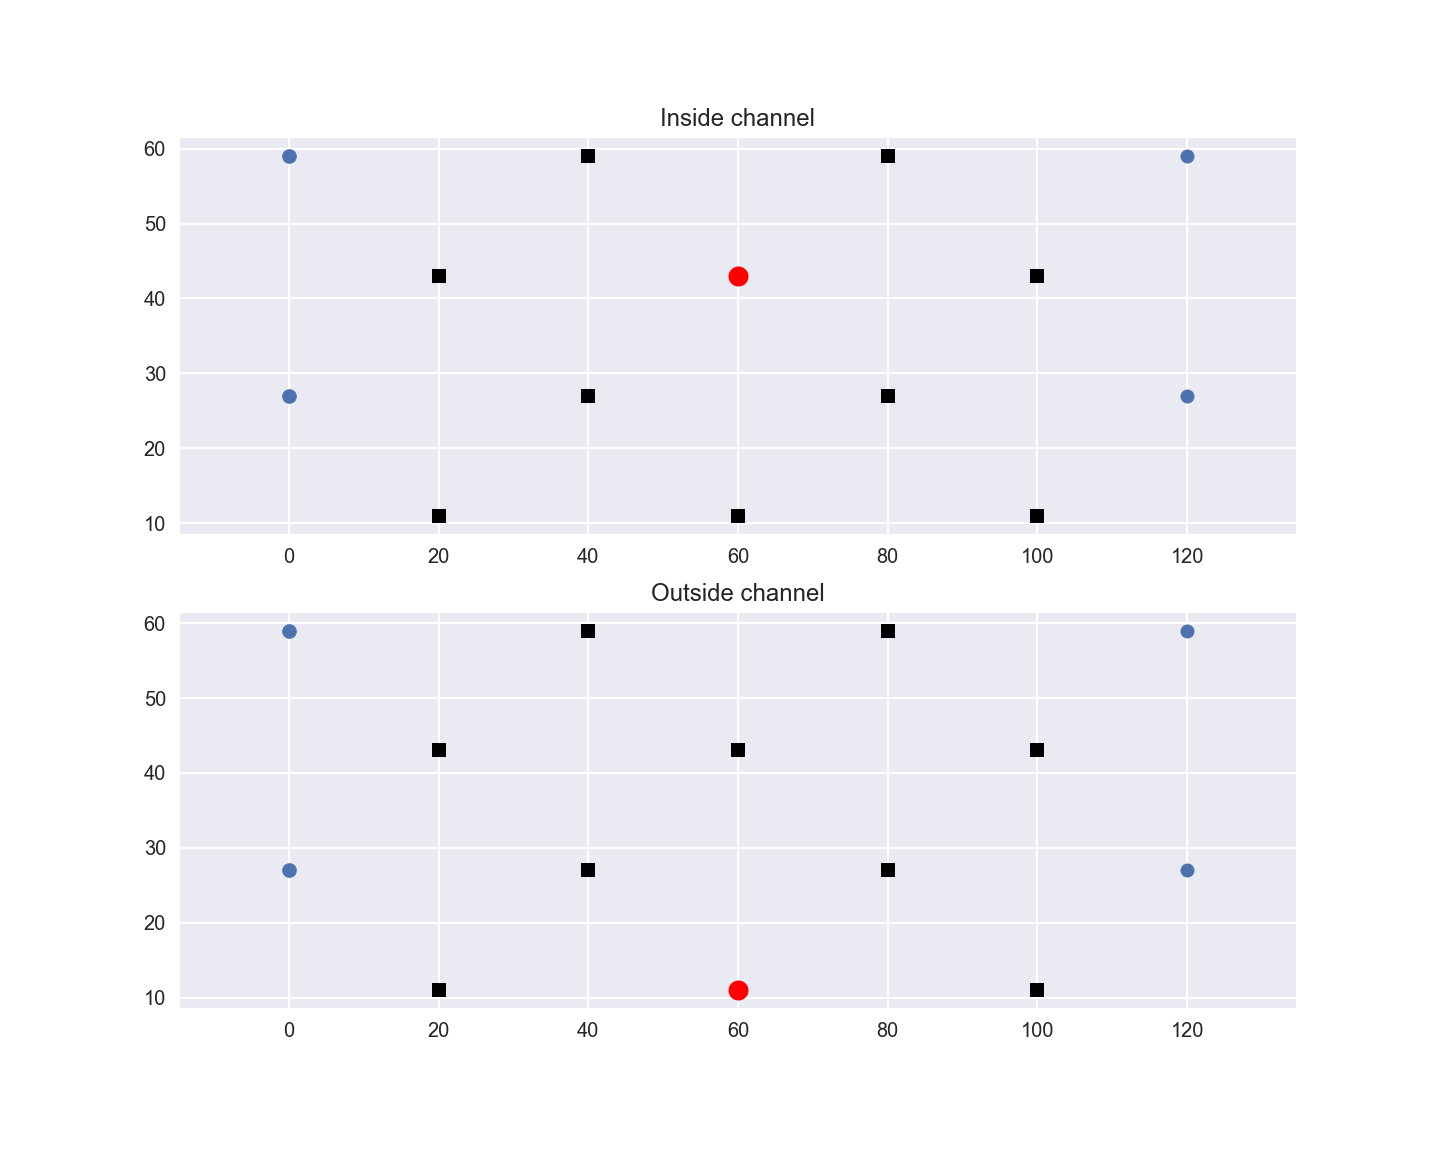

In [27]:
chpos = np.load('/Users/josh/Project/data/chpos.npy')[:20]
%matplotlib notebook
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title('Inside channel')
plt.axis('equal')
plt.scatter(chpos[2:4,1]-40, chpos[2:4,0])
plt.plot(chpos[4:8,1]-40, chpos[4:8,0], 'ks')
plt.plot(chpos[8,1]-40, chpos[8,0], 'ro', ms=10)
plt.plot(chpos[9:14,1]-40, chpos[9:14,0], 'ks')
plt.plot(chpos[14:16,1]-40, chpos[14:16,0], 'C0o')
# plt.xticks(())
# plt.yticks(())

plt.subplot(2,1,2)
plt.axis('equal')
plt.title('Outside channel')
plt.scatter(chpos[2:4,1]-40, chpos[2:4,0])
plt.plot(chpos[4:9,1]-40, chpos[4:9,0], 'ks')
plt.plot(chpos[9,1]-40, chpos[9,0], 'ro', ms=10)
plt.plot(chpos[10:14,1]-40, chpos[10:14,0], 'ks')
plt.plot(chpos[14:16,1]-40, chpos[14:16,0], 'C0o')
# plt.xticks(())
# plt.yticks(())

<IPython.core.display.Javascript object>


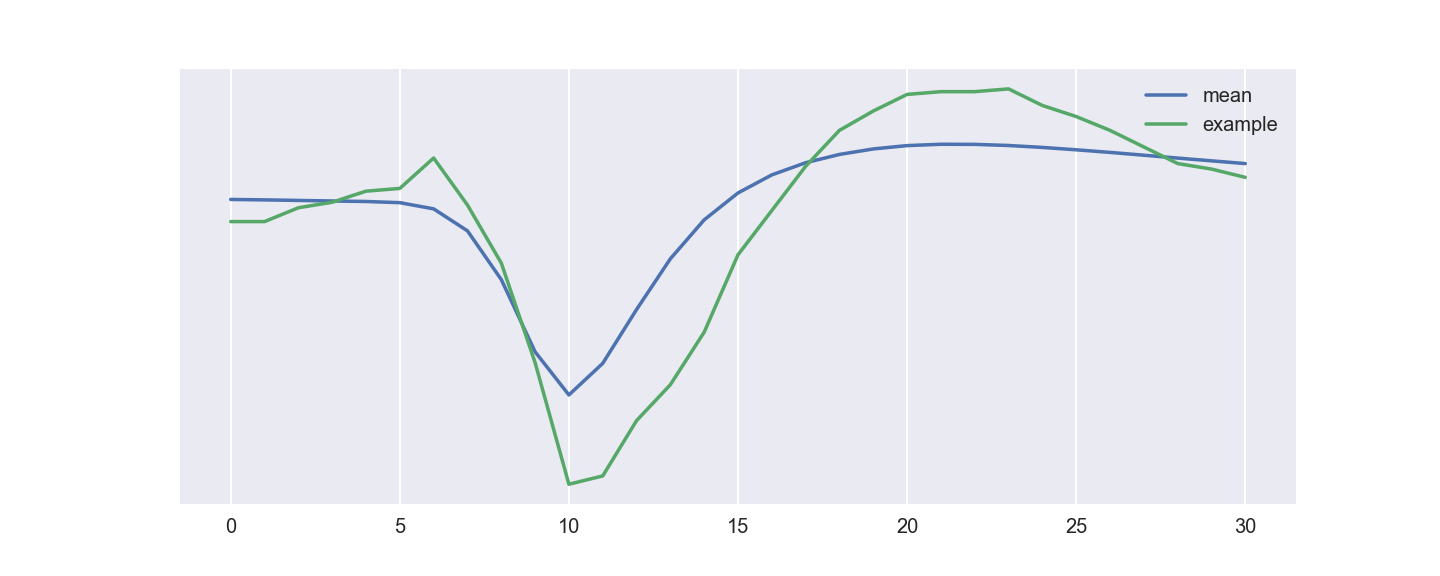

([], <a list of 0 Text yticklabel objects>)

In [3]:
%matplotlib notebook
plt.figure(figsize=(10,4))
mean = np.mean(cutouts, axis=0)
plt.plot(np.arange(31),mean, label = 'mean')
plt.plot(np.arange(31),cutouts[12,:], label = 'example')
plt.legend()
plt.yticks(())

<IPython.core.display.Javascript object>


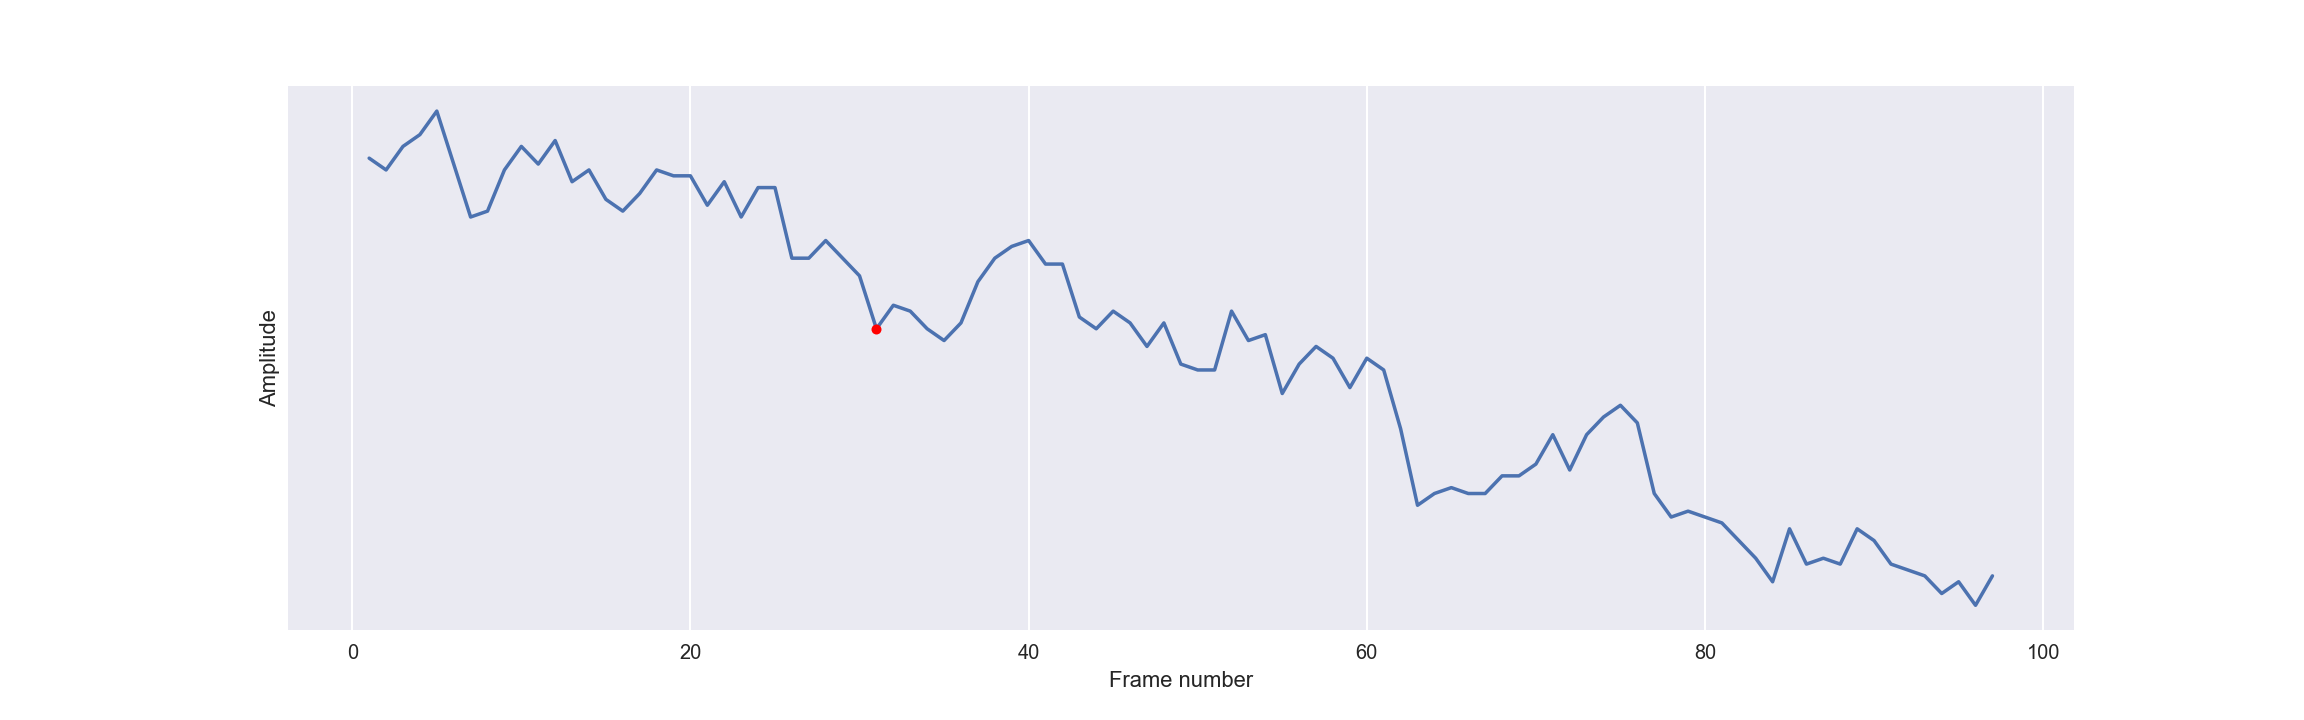

In [37]:
a = '38 36 40 42 46 37 28 29 36 40 37 41 34 36 31 29 32 36 35 35 30 34 28 33 33 21 21 24 21 18 9 13 12 9 7 10 17 21 23 24 20 20 11 9 12 10 6 10 3 2 2 12 7 8 -2 3 6 4 -1 4 2 -8 -21 -19 -18 -19 -19 -16 -16 -14 -9 -15 -9 -6 -4 -7 -19 -23 -22 -23 -24 -27 -30 -34 -25 -31 -30 -31 -25 -27 -31 -32 -33 -36 -34 -38 -33'.split()

a = map(int, a)

x = np.arange(len(a))

plt.figure(figsize=(16,5))
plt.plot(x+1,a)
plt.plot([31], a[30],'r.',ms=10)
plt.ylabel('Amplitude')
plt.xlabel('Frame number')
plt.yticks(())
plt.savefig('brokenwave.png', dpi='figure', format='png', bbox_inches='tight')